In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.graph_objects as go

import plotly.express as px
import plotly.io as pio
import datetime as dt

from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv('daily_cases.csv', infer_datetime_format = True, parse_dates = True)

In [3]:
df.tail()

,Date,Cases
137,7/29/2020,1763
138,7/30/2020,2344
139,7/31/2020,1954
140,8/1/2020,1730
141,8/2/2020,1341


In [4]:
df.dropna(inplace = True)

In [5]:
df['Change'] = df['Cases'].pct_change()
df.head()

,Date,Cases,Change
0,3/14/2020,8,NaN
1,3/15/2020,9,0.125000
2,3/16/2020,6,-0.333333
3,3/17/2020,6,0.000000
4,3/18/2020,23,2.833333


In [6]:
df.dropna(inplace = True)
df.tail()

,Date,Cases,Change
137,7/29/2020,1763,0.008005
138,7/30/2020,2344,0.329552
139,7/31/2020,1954,-0.166382
140,8/1/2020,1730,-0.114637
141,8/2/2020,1341,-0.224855


In [7]:
df.index = pd.to_datetime(df['Date'])

In [8]:
df['Month'] = df.index.month
df['Rolling_Peak']=2023
df['Actual_Peak']=2481

In [9]:
df.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='Date', length=141)

In [10]:
days = df.loc[df.index.weekday==0]
days1 = df.loc[df.index.weekday!=0]

In [11]:
month_df = df
# month_df = df.loc[df['Month'].isin([6,7])]
# month_df = month_df[(month_df['Cases']<2400) & (month_df['Cases']>1400)]


C:\Users\lorie\Anaconda3\envs\pyvizenv25\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


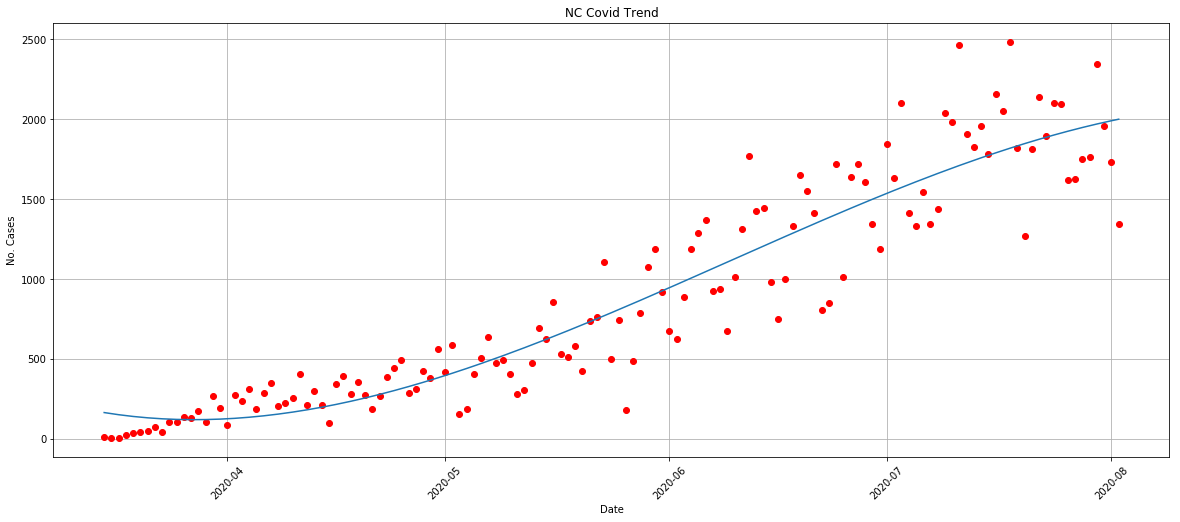

In [12]:
y_values = month_df.loc[:, "Cases"]
x_values = np.linspace(0,1,len(month_df.loc[:, "Cases"]))
poly_degree = 3

coeffs = np.polyfit(x_values, y_values, poly_degree)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)

plt.figure(figsize=(20,8))
plt.plot(month_df.index, month_df.loc[:,"Cases"], "ro")
plt.plot()
plt.plot(month_df.index,y_hat)
plt.title('NC Covid Trend')
plt.ylabel('No. Cases')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid()


In [ ]:
fig = go.Figure()
# Create and style traces

fig.add_trace(go.Bar(x=df.index, y=df.Cases, name = 'Cases Reported'))
fig.add_trace(go.Scatter(x=df.index, y=df.Cases.rolling(7).mean(), name='Rolling Avg 7 Days',
                         line=dict(color='black', width=3)))
fig.add_trace(go.Scatter(x=df.index, y=df.Rolling_Peak, name = 'Rolling Avg Peak (so far)', line=dict(color='orange', width=3)))
fig.add_trace(go.Scatter(x=df.index, y=df.Actual_Peak, name = 'Actual Cases Peak (so far)', line=dict(color='red', width=3)))
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Daily Cases Trend')
pio.write_html(fig, file='Cases_Trend.html', auto_open=False)
fig.show()

In [ ]:

plt.figure(figsize=[20,15])
plt.scatter(x=df.index, y=df['Cases'])
plt.axhline(y=1268)

plt.grid()